In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np

In [5]:
!ls 'drive/My Drive/Hackathon/Hackathon/CreditCardFraud'

credit_test.csv  credit_train.csv


In [0]:
credit_train = pd.read_csv('drive/My Drive/Hackathon/Hackathon/CreditCardFraud/credit_train.csv')
credit_test = pd.read_csv('drive/My Drive/Hackathon/Hackathon/CreditCardFraud/credit_test.csv')

In [4]:
credit_train.shape

(227845, 30)

In [5]:
credit_train.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.456417,1.327516,-0.635254,-2.765440,0.282230,-0.758234,0.365270,0.927673,0.033947,-1.138995,-0.715508,-0.254224,-1.846171,1.245659,-0.971792,1.078462,-0.978420,0.279756,-0.152780,-0.273173,-0.268150,-1.027990,-0.123132,-1.147477,0.058896,0.434728,0.067085,0.072365,4.0,'0'
1,-0.879383,1.138867,0.834804,0.904867,0.164135,-0.486903,0.286551,0.437374,-0.751725,-0.293550,-0.381957,0.326399,0.417563,0.601584,1.204848,-0.519876,0.241959,-0.342213,0.028826,0.099614,0.208368,0.597398,-0.073658,0.098907,-0.232732,-0.289270,0.314182,0.120301,11.8,'0'
2,1.270210,-0.755504,1.070372,-0.745716,-1.365979,-0.049645,-1.197854,0.207163,-0.677824,0.731290,1.785716,0.214798,0.189485,-0.214334,0.649570,1.323136,0.156679,-0.875203,0.076711,0.068690,0.475541,1.321484,-0.061854,0.280606,0.297015,-0.050341,0.050163,0.014809,14.0,'0'
3,1.967062,0.445029,-2.472415,1.290097,1.284233,-0.398478,0.641294,-0.209637,-0.219990,-0.224304,0.938790,0.958131,0.411124,-0.957568,-1.072667,0.047732,0.575615,0.567974,-0.012912,-0.107689,0.011025,0.184953,-0.079679,0.188458,0.516061,-0.521453,-0.005402,-0.030380,32.0,'0'
4,-0.626555,1.218109,0.871426,0.950972,-0.311923,-0.711223,0.686529,0.214618,-0.916320,-0.506793,-0.609644,0.231146,0.504067,0.584423,0.930015,-0.210375,-0.049258,0.122546,0.411973,0.034475,0.237543,0.529095,0.015473,0.401008,-0.195985,-0.335558,0.031509,0.106962,64.9,'0'


In [0]:
credit_train['src'] = 0
credit_test['src'] = 1

In [0]:
src = pd.concat([credit_train,credit_test])

In [8]:
src['Class'].unique()

array(["'0'", "'1'"], dtype=object)

In [0]:
src.loc[src['Class'] == "'0'",'Class'] = 0
src.loc[src['Class'] == "'1'",'Class'] = 1

In [10]:
src[src['Class'] == 1].shape

(492, 31)

In [11]:
src.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284807 entries, 0 to 56961
Data columns (total 31 columns):
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26       284807 non-null float64
V27   

In [15]:
src[round(src['V28'],6) == 0.060707]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,src
18895,1.239091,0.835320,-0.315684,1.335451,0.222517,-1.205174,0.414955,-0.331374,-0.320341,-0.726132,0.378558,0.689671,1.458785,-1.638517,0.923306,0.526684,0.805813,0.408050,-0.633745,-0.000631,-0.050629,0.001293,-0.142445,0.288131,0.743170,-0.332149,0.045161,0.060707,1.0,0,0
42100,1.239091,0.835320,-0.315684,1.335451,0.222517,-1.205174,0.414955,-0.331374,-0.320341,-0.726132,0.378558,0.689671,1.458785,-1.638517,0.923306,0.526684,0.805813,0.408050,-0.633745,-0.000631,-0.050629,0.001293,-0.142445,0.288131,0.743170,-0.332149,0.045161,0.060707,1.0,0,1
45850,0.015314,0.541936,1.115305,0.641662,-0.006298,-0.212681,0.482217,0.167652,0.731909,-0.651851,-1.756098,-0.492569,-2.021549,-0.041185,-1.428538,-0.382574,-0.010086,-0.627859,-0.045441,-0.365539,-0.460815,-1.177206,0.210007,-0.150910,-0.643225,-1.171212,0.119722,0.060707,10.1,0,1


In [0]:
src.drop_duplicates(inplace=True)

In [13]:
src.shape

(277706, 31)

In [64]:
src.isin([0]).sum()

V1             0
V2             0
V3             0
V4             0
V5             0
V6             0
V7             0
V8             0
V9             0
V10            0
V11            0
V12            0
V13            0
V14            0
V15            0
V16            0
V17            0
V18            0
V19            0
V20            0
V21            0
V22            0
V23            0
V24            0
V25            0
V26            0
V27            0
V28            0
Amount      1781
Class     277230
src       221447
dtype: int64

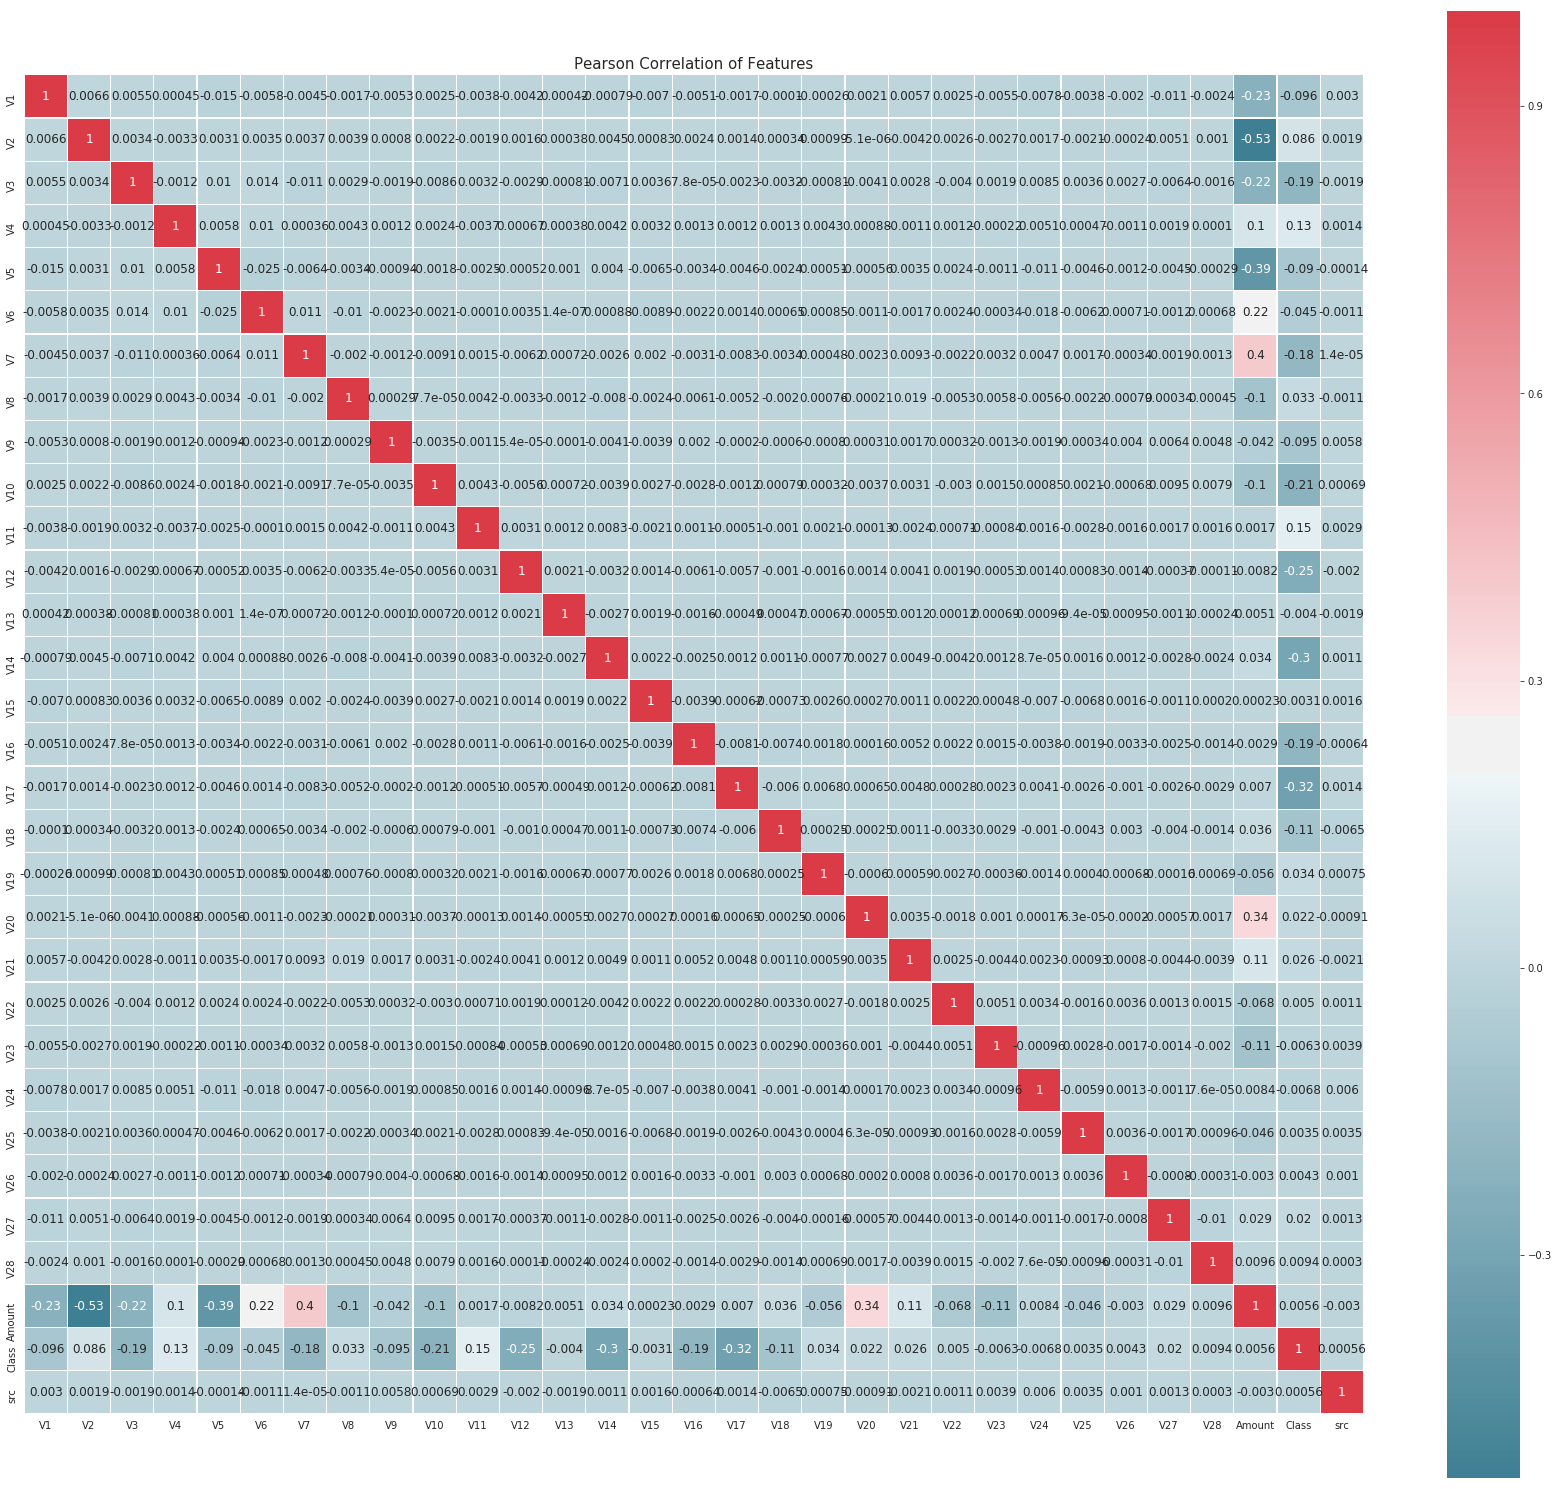

In [49]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(30, 30))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(src)

In [19]:
src.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,src
count,277706.000000,277706.000000,277706.000000,277706.000000,277706.000000,277706.000000,277706.000000,277706.000000,277706.000000,277706.000000,277706.000000,277706.000000,277706.000000,277706.000000,277706.000000,277706.000000,277706.000000,277706.000000,277706.000000,277706.000000,277706.000000,277706.000000,277706.000000,277706.000000,277706.000000,277706.000000,277706.000000,277706.000000,277706.000000,277706.000000,277706.000000
mean,-0.029554,-0.001489,0.020827,-0.002778,-0.010011,-0.013453,0.006748,-0.004858,-0.009322,0.002300,-0.005724,-0.003688,0.000660,0.000761,-0.008561,-0.003353,0.000460,0.002925,0.000640,0.002659,0.001880,0.004552,-0.001494,-0.005706,-0.003855,-0.000131,0.001475,0.000695,90.082456,0.001714,0.202585
std,1.954360,1.663922,1.508901,1.421973,1.377634,1.315205,1.239696,1.191002,1.100006,1.087573,1.020625,0.998951,0.998963,0.953629,0.917119,0.879244,0.845200,0.840867,0.818943,0.777849,0.732117,0.726076,0.630009,0.605298,0.523483,0.483786,0.401737,0.332077,252.478042,0.041366,0.401926
min,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000,0.000000
25%,-0.936874,-0.610029,-0.852057,-0.859522,-0.698811,-0.766745,-0.552703,-0.209628,-0.655966,-0.538130,-0.771169,-0.411998,-0.653342,-0.425776,-0.593609,-0.475574,-0.482515,-0.498850,-0.462928,-0.211995,-0.225808,-0.534582,-0.164624,-0.359663,-0.322158,-0.328074,-0.071561,-0.052727,6.140000,0.000000,0.000000
50%,-0.041122,0.069657,0.196684,-0.030019,-0.060230,-0.272534,0.043854,0.022482,-0.061404,-0.092165,-0.038284,0.135329,-0.011646,0.049876,0.038087,0.062734,-0.063837,0.000430,0.001734,-0.059149,-0.026539,0.012011,-0.013071,0.038140,0.011316,-0.055475,0.002302,0.011670,23.280000,0.000000,0.000000
75%,1.297485,0.815974,1.043752,0.751625,0.603954,0.387290,0.580746,0.322079,0.594373,0.467122,0.736324,0.616124,0.667802,0.492325,0.640543,0.524449,0.400852,0.506194,0.464486,0.138287,0.188424,0.532833,0.146111,0.433631,0.347762,0.243540,0.093885,0.080771,79.207500,0.000000,0.000000
max,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,12.018913,7.848392,7.126883,10.526766,8.877742,17.315112,9.253526,5.041069,5.591971,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000,1.000000


In [0]:
train = src[src['src'] == 0]
test = src[src['src'] == 1]

In [0]:
inp_cols = list(train.columns)
inp_cols.remove('Class')
inp_cols.remove('src')
X_train = train[inp_cols]
Y_train = train['Class']
X_test = test[inp_cols]
Y_test = test['Class']

In [0]:
from sklearn import preprocessing
X_train = preprocessing.StandardScaler().fit(X_train).transform(X_train.astype(float))
X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test.astype(float))

In [45]:
test.shape

(56259, 31)

In [68]:
test['Class'].unique()

array([0, 1])

In [70]:
print(X_test.shape)
print(Y_test.shape)

(56259, 29)
(56259,)


In [0]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

In [30]:
#Machine Learning Algorithm (MLA) Selection and Initialization
MLA = [

    # #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
    XGBClassifier()   
    ]

    #split dataset in cross-validation with this splitter class: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit
#note: this is an alternative to train_test_split
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#create table to compare MLA predictions
MLA_predict = Y_test

#index through MLA and save performance to table
row_index = 0
res = {}
for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    cv_results = model_selection.cross_validate(alg, X_train, Y_train, cv  = cv_split)

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    # MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
    

    #save MLA predictions - see section 6 for usage
    alg.fit(X_train, Y_train)
    Y_pred = alg.predict(X_test)
    res[MLA_name] = Y_pred
    print(MLA_name)
    print(metrics.confusion_matrix(Y_test,Y_pred))
    
    row_index+=1

    
#print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare

DecisionTreeClassifier
[[56128    32]
 [   30    69]]
ExtraTreeClassifier
[[56129    31]
 [   28    71]]
LinearDiscriminantAnalysis
[[56144    16]
 [   23    76]]
QuadraticDiscriminantAnalysis
[[54829  1331]
 [   15    84]]
XGBClassifier
[[56149    11]
 [   23    76]]


,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
4,XGBClassifier,"{'base_score': 0.5, 'booster': 'gbtree', 'cols...",NaN,0.999478,0.00038213,31.0392
2,LinearDiscriminantAnalysis,"{'n_components': None, 'priors': None, 'shrink...",NaN,0.999393,0.00041537,0.6271
0,DecisionTreeClassifier,"{'class_weight': None, 'criterion': 'gini', 'm...",NaN,0.999076,0.000309712,11.0243
1,ExtraTreeClassifier,"{'class_weight': None, 'criterion': 'gini', 'm...",NaN,0.998975,0.000258974,0.259311
3,QuadraticDiscriminantAnalysis,"{'priors': None, 'reg_param': 0.0, 'store_cova...",NaN,0.97646,0.00339485,0.313017


AdaBoostClassifier
[[56136    24]
 [   27    72]]
BaggingClassifier
[[56154     6]
 [   25    74]]
ExtraTreesClassifier
[[56153     7]
 [   24    75]]
GradientBoostingClassifier
[[56137    23]
 [   32    67]]
RandomForestClassifier
[[56153     7]
 [   24    75]]
 LogisticRegressionCV
[[56145    15]
 [   39    60]]
PassiveAggressiveClassifier
[[56112    48]
 [   21    78]]
RidgeClassifierCV
[[56148    12]
 [   59    40]]
SGDClassifier
[[56148    12]
 [   44    55]]
Perceptron
[[56126    34]
 [   22    77]]
BernoulliNB
[[56141    19]
 [   33    66]]
GaussianNB
[[54870  1290]
 [   18    81]]
 KNeighborsClassifier
[[56148    12]
 [   21    78]]
 SVC
[[56154     6]
 [   32    67]]
 DecisionTreeClassifier
[[56128    32]
 [   30    69]]
ExtraTreeClassifier
[[56129    31]
 [   28    71]]
LinearDiscriminantAnalysis
[[56144    16]
 [   23    76]]
QuadraticDiscriminantAnalysis
[[54829  1331]
 [   15    84]]
XGBClassifier
[[56149    11]
 [   23    76]]

**Best result**

In [34]:
print('XGBClassifier')
print(classification_report(Y_test, res['XGBClassifier']))

XGBClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56160
           1       0.87      0.77      0.82        99

    accuracy                           1.00     56259
   macro avg       0.94      0.88      0.91     56259
weighted avg       1.00      1.00      1.00     56259



FNN

In [35]:
from keras.models import Sequential
from keras import optimizers
from keras.layers import Activation, Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization

Using TensorFlow backend.


In [0]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

In [37]:
X_train.shape

(221447, 29)

In [0]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (X_train.shape[1], )))
    model.add(BatchNormalization())
    model.add(Activation('elu'))  
    model.add(Dropout(0.2))  
    model.add(Dense(50))
    model.add(BatchNormalization())
    model.add(Activation('elu'))    
    model.add(Dropout(0.2))
    model.add(Dense(50))
    model.add(BatchNormalization())
    model.add(Activation('elu'))  
    model.add(BatchNormalization()) 
    model.add(Dropout(0.2)) 
    model.add(Dense(50))
    model.add(BatchNormalization())
    model.add(Activation('elu'))    
    model.add(Dropout(0.2))
    model.add(Dense(2))
    model.add(BatchNormalization())
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [0]:
model1 = KerasClassifier(build_fn = mlp_model, epochs = 30, verbose = 1)
model2 = KerasClassifier(build_fn = mlp_model, epochs = 10, verbose = 1)
model3 = KerasClassifier(build_fn = mlp_model, epochs = 20, verbose = 1)

In [0]:
ensemble_clf = VotingClassifier(estimators = [('model1', model1), ('model2', model2), ('model3', model3)], voting = 'soft')

In [45]:
ensemble_clf.fit(X_train, Y_train)

Epoch 1/30
221447/221447 [==============================] - 36s 165us/step - loss: 0.0920 - acc: 0.9919
Epoch 2/30
221447/221447 [==============================] - 31s 142us/step - loss: 0.0045 - acc: 0.9993
Epoch 3/30
221447/221447 [==============================] - 32s 143us/step - loss: 0.0034 - acc: 0.9994
Epoch 4/30
221447/221447 [==============================] - 32s 145us/step - loss: 0.0033 - acc: 0.9994
Epoch 5/30
221447/221447 [==============================] - 31s 140us/step - loss: 0.0033 - acc: 0.9993
Epoch 6/30
221447/221447 [==============================] - 31s 139us/step - loss: 0.0032 - acc: 0.9993
Epoch 7/30
221447/221447 [==============================] - 31s 141us/step - loss: 0.0031 - acc: 0.9994
Epoch 8/30
221447/221447 [==============================] - 31s 140us/step - loss: 0.0031 - acc: 0.9994
Epoch 9/30
221447/221447 [==============================] - 31s 142us/step - loss: 0.0030 - acc: 0.9993
Epoch 10/30
221447/221447 [==============================] - 33s

VotingClassifier(estimators=[('model1',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x7efe681694a8>),
                             ('model2',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x7efe681692e8>),
                             ('model3',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x7efe68169ac8>)],
                 flatten_transform=True, n_jobs=None, voting='soft',
                 weights=None)

In [46]:
y_pred = ensemble_clf.predict(X_test)

56259/56259 [==============================] - 2s 44us/step


In [47]:
print('Test accuracy:')
print(classification_report(Y_test, y_pred))

Test accuracy:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56160
           1       0.79      0.79      0.79        99

    accuracy                           1.00     56259
   macro avg       0.89      0.89      0.89     56259
weighted avg       1.00      1.00      1.00     56259



In [48]:
y_pred = ensemble_clf.predict(X_train)
print('Train accuracy:')
print(classification_report(Y_train, y_pred))

221447/221447 [==============================] - 7s 34us/step
Train accuracy:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    221070
           1       0.86      0.80      0.83       377

    accuracy                           1.00    221447
   macro avg       0.93      0.90      0.91    221447
weighted avg       1.00      1.00      1.00    221447

